In [2]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearnex import patch_sklearn
from sklearnex.svm import SVC
from sklearnex import patch_sklearn
patch_sklearn()
from sklearnex.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import numpy as np


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
iris = load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Train a Random Forest model on the training data and extract important features
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
important_features = rf_model.feature_importances_


In [5]:
# Use PCA to reduce the dimensionality of the dataset based on the important features
pca = PCA(n_components=2)
X_train_reduced = pca.fit_transform(X_train[:, important_features.argsort()[::-1]])
X_test_reduced = pca.transform(X_test[:, important_features.argsort()[::-1]])



/home/u186172/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)
/home/u186172/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


In [7]:
# Train an SVM model using the reduced dataset
svm_model = SVC(kernel='linear', C=1, random_state=42)
svm_model.fit(X_train_reduced, y_train)

# Use the SVM model to make predictions on the testing data
y_pred = svm_model.predict(X_test_reduced)

# Evaluate the performance of the hybrid model using accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 96.67%


In [9]:
!pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 3.1 MB/s eta 0:00:0000:0100:01


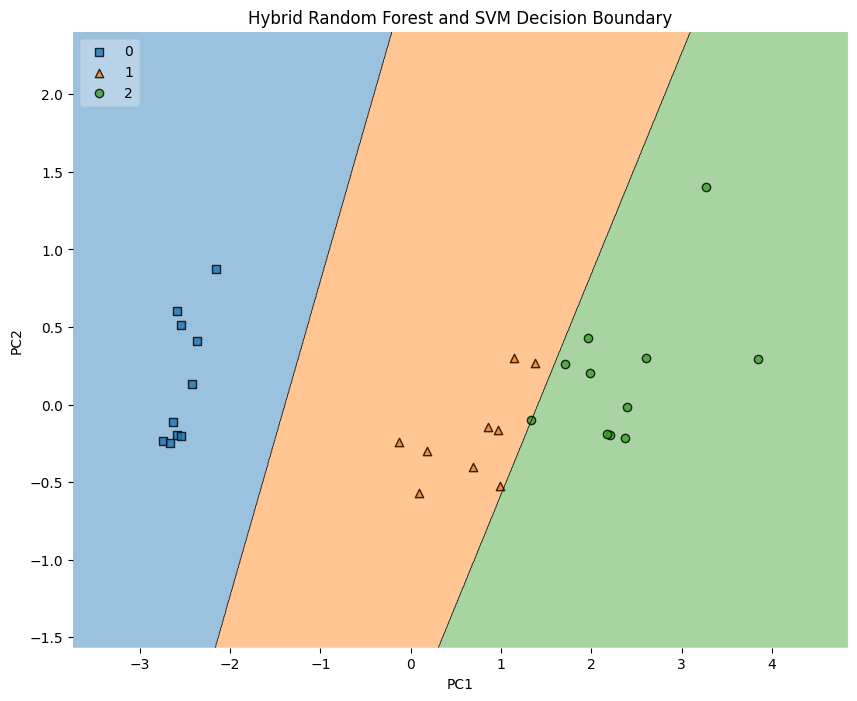

In [10]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Plot the decision boundary for the hybrid model
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test_reduced, y_test, clf=svm_model, legend=2)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Hybrid Random Forest and SVM Decision Boundary')
plt.show()